In [5]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import math

import numpy as np
import matplotlib.pyplot as plt

def iterate_map(f, x_0, n):
    # extended for multi-dim case
    # trajectory = [x_0] * (n+1)
    trajectory = np.stack([x_0] * (n+1), axis=0)
    trajectory[0] = x_0
    for i in range(1, n + 1):
        trajectory[i] = f(*trajectory[i-1])
    
    return trajectory

def get_plot(f, x_start, x_end, x_step=0.01):
    f_vec = np.vectorize(f)
    x = np.arange(x_start, x_end, x_step)
    y = f_vec(x)
    return np.column_stack((x, y))

def get_cobweb(trajectory):
    coords = np.column_stack((np.repeat(trajectory[:-1], 2), 
                              np.repeat(trajectory[1:], 2)))
    coords[::2] = np.column_stack((trajectory[:-1], trajectory[:-1]))
    return coords

identity_fn = lambda x: x

In [6]:
def problem_1(fn, x_start=0, x_end=1, x_step=0.01):
    line = get_plot(identity_fn, x_start, x_end, x_step)
    plot = get_plot(fn, x_start, x_end, x_step)
    
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.grid(True)
    
    ax.plot(plot[:,0], plot[:,1])
    ax.plot(line[:,0], line[:,1])
    
    plt.show()

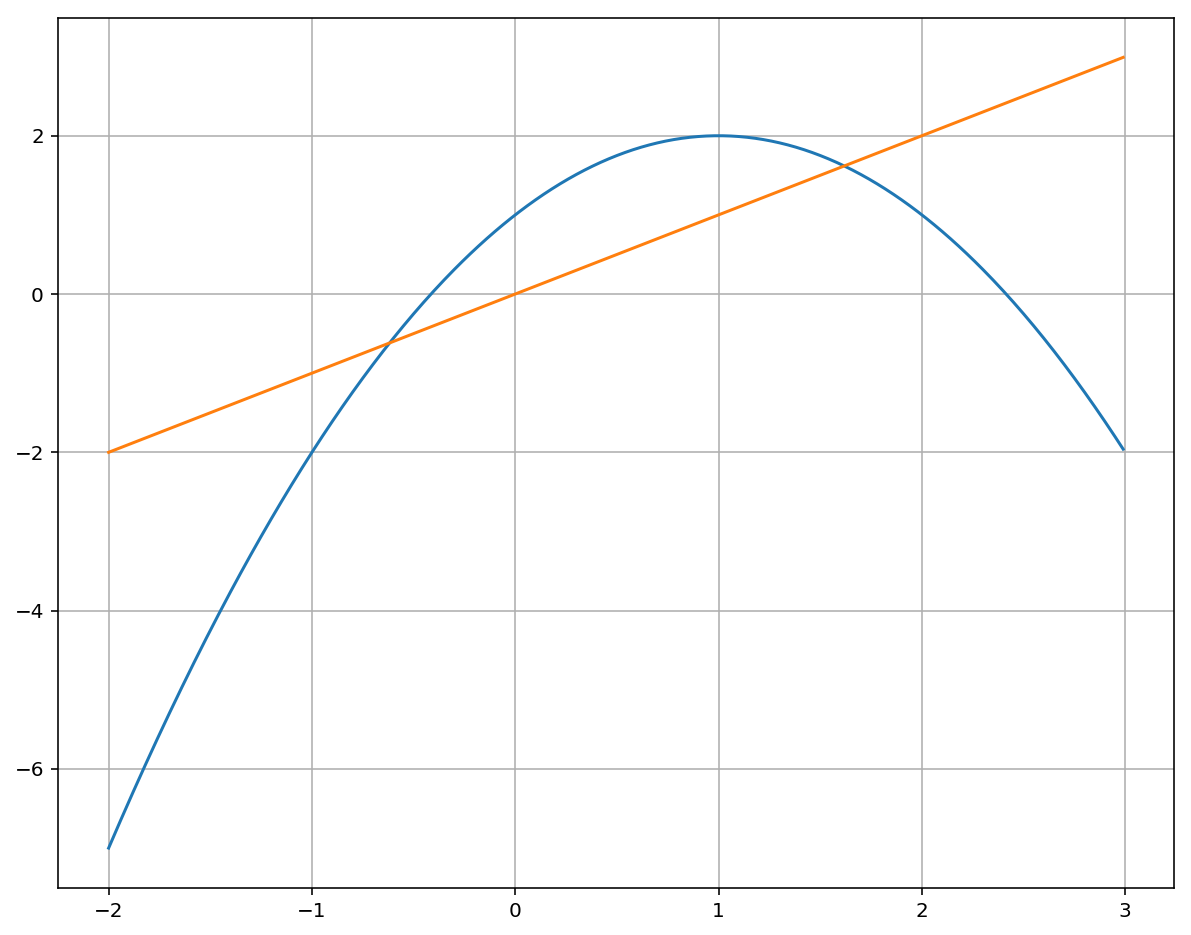

Fixed points:
-0.618, source
1.618, source

Derivatives of fixed points:
3.23606797749979
1.2360679774997898


In [7]:
problem_1(lambda x: 1 + (2 * x) - (x**2), -2, 3)
print("Fixed points:")
print("{}, source".format(-1.236 / 2))
print("{}, source".format(3.236 / 2))
print("\nDerivatives of fixed points:")
print(abs((lambda x: 2 - 2*x)((1 - math.sqrt(5)) / 2)))
print(abs((lambda x: 2 - 2*x)((1 + math.sqrt(5)) / 2)))

**Fixed points:**

$-0.618$, source  
$1.618$, source

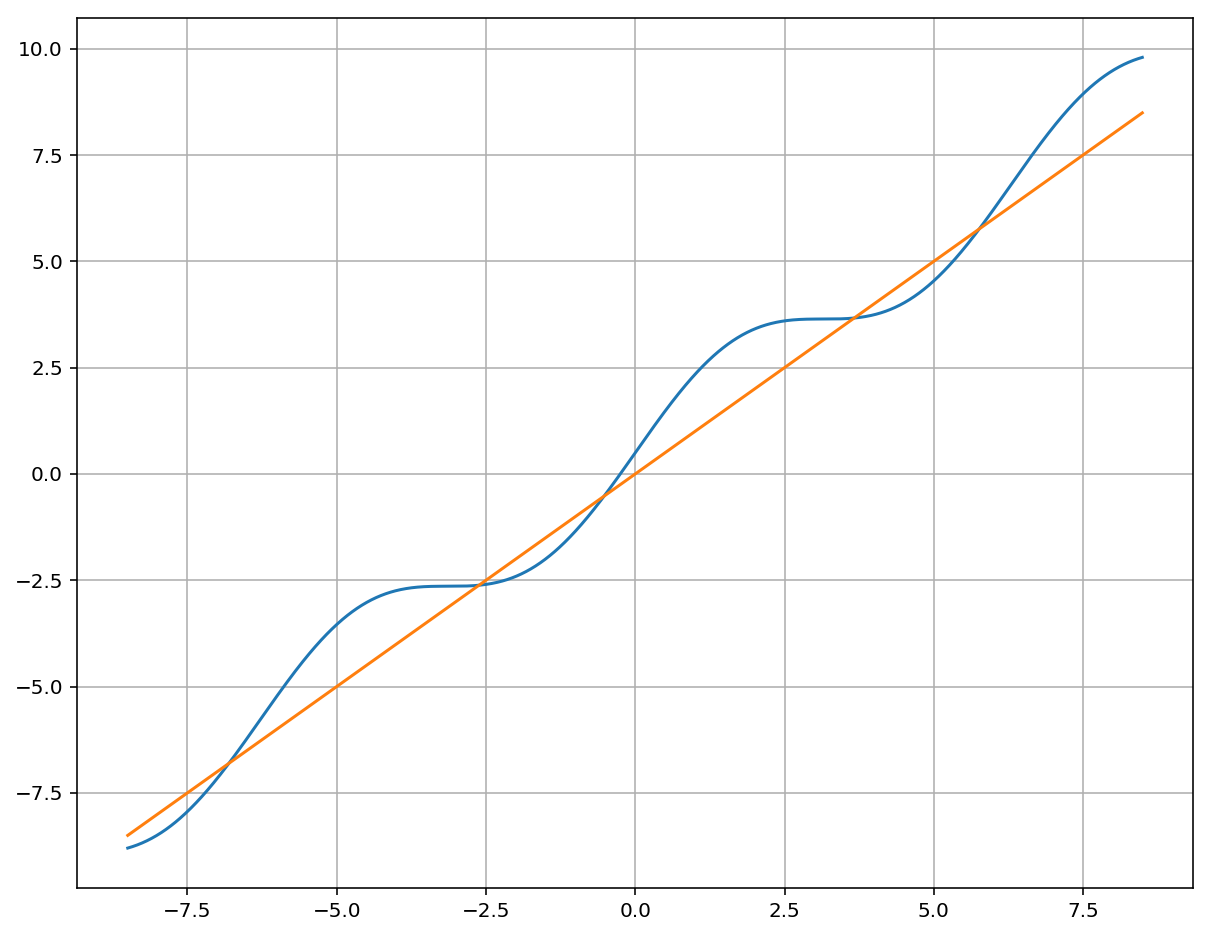

-0.5235987755982988
3.665191429188092

1.8660254037844386
0.1339745962155614


In [8]:
problem_1(lambda x: 0.5 + x + math.sin(x), -8.5, 8.5)
print(-math.pi / 6)
print(7 * math.pi / 6)
print()
print(1 + (math.sqrt(3)/2)) # source
print(1 - (math.sqrt(3)/2)) # sink

**Fixed points:**

$x = {-\pi \over 6} + 2 \pi n,\ n \in \mathbb{Z}$, are sources

$x = {7\pi \over 6} + 2 \pi n,\ n \in \mathbb{Z}$, are sinks

Basin of attraction of the sink ${7\pi \over 6} + 2 \pi n$ is:

$\left({-\pi \over 6} + 2 \pi n, {11 \pi \over 6} + 2 \pi n\right)$




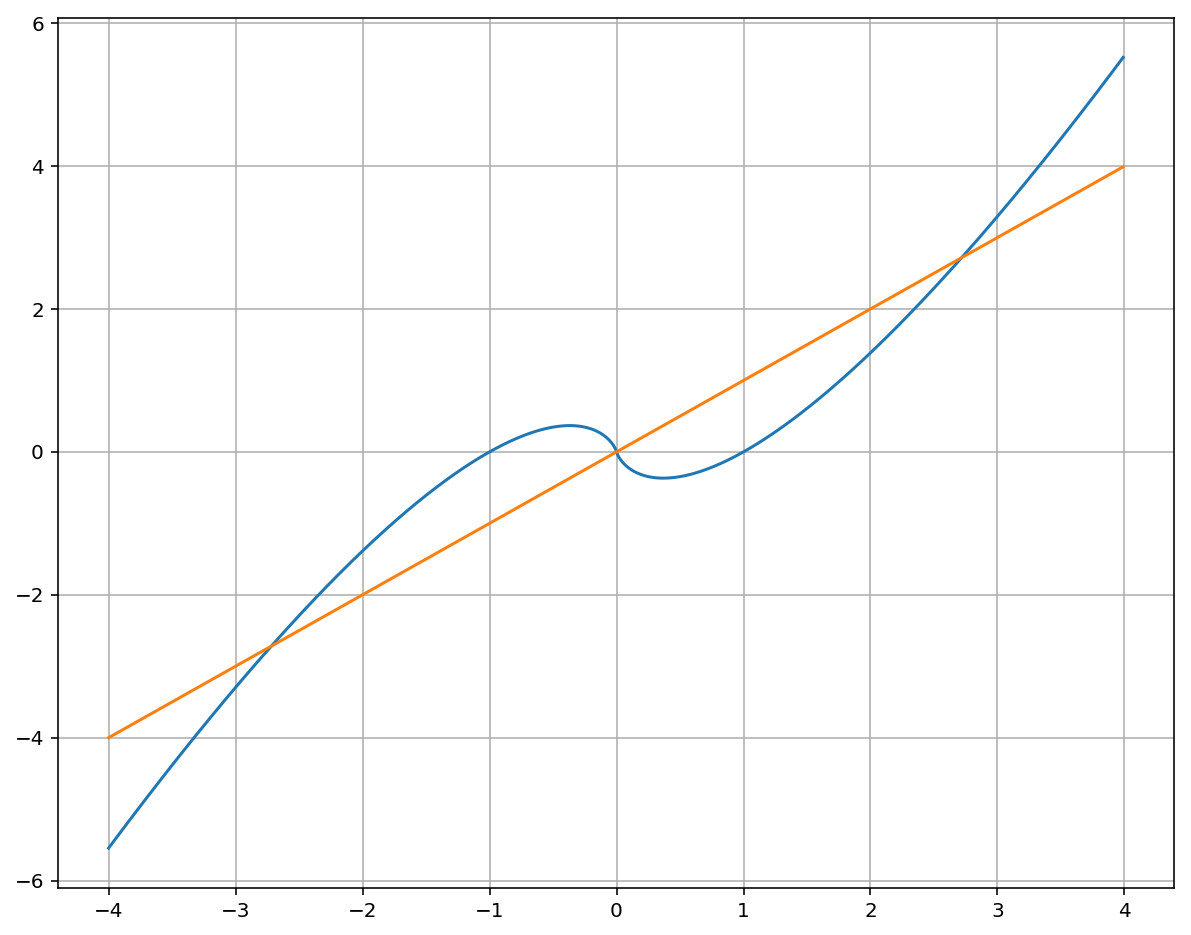

In [9]:
problem_1(lambda x: x * math.log(abs(x)) if x != 0 else 0, -4, 4)

**Fixed points:**

$x = e, -e, 0$ are sources

In [10]:
def compute_lyapunov_exponent(fn, deriv, val, num_iterates=10**6):
    trajectory = iterate_map(fn, val, num_iterates)
    return np.sum(np.log(np.abs(deriv(trajectory)))) / trajectory.size

# not named find because that implies a search in a set
def compute_lyapunov_number(fn, deriv, val, num_iterates=10**6):
    return math.exp(compute_lyapunov_exponent(fn, deriv, val, num_iterates))

In [11]:
def problem_2():
    a = 1
    b = 5 / 2
    c = -3 / 2
    
    fn = lambda x: a + b*x + c*(x**2)
    fn_deriv = lambda x: b + 2*c*x
    le_term = lambda x: math.log(abs(fn_deriv(x)))
    
    lyapunov_exp = (1/3) * (le_term(0) + le_term(1) + le_term(2))
    print("a = {}\nb = {}\nc = {}".format(a, b, c))
    print()
    print("Lyapunov number:")
    print(math.exp(lyapunov_exp))
    print()
    print("Lyapunov number (computed iteratively to check):")
    print(compute_lyapunov_number(fn, fn_deriv, [0], 10**6))

In [12]:
problem_2()
# 1.6355319107919908

a = 1
b = 2.5
c = -1.5

Lyapunov number:
1.6355331550942949

Lyapunov number (computed iteratively to check):
1.6355319107919908


The cycle $(0, 1, 2)$ is a periodic source. The Lyapunov number of 0, which can be thought of as the scaling factor of the trajectory of the neighborhood, is greater than 1, so points in the neighborhood diverge as the map is iteratively applied.

In [13]:
def problem_3(a=1, x_start=-6, x_end=6, x_step=0.01):
    fn = lambda x: 1 + x + a*math.sin(x)
    
    line = get_plot(identity_fn, x_start, x_end, x_step)
    plot = get_plot(fn, x_start, x_end, x_step)
    
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.grid(True)
    
    ax.plot(plot[:,0], plot[:,1])
    ax.plot(line[:,0], line[:,1])

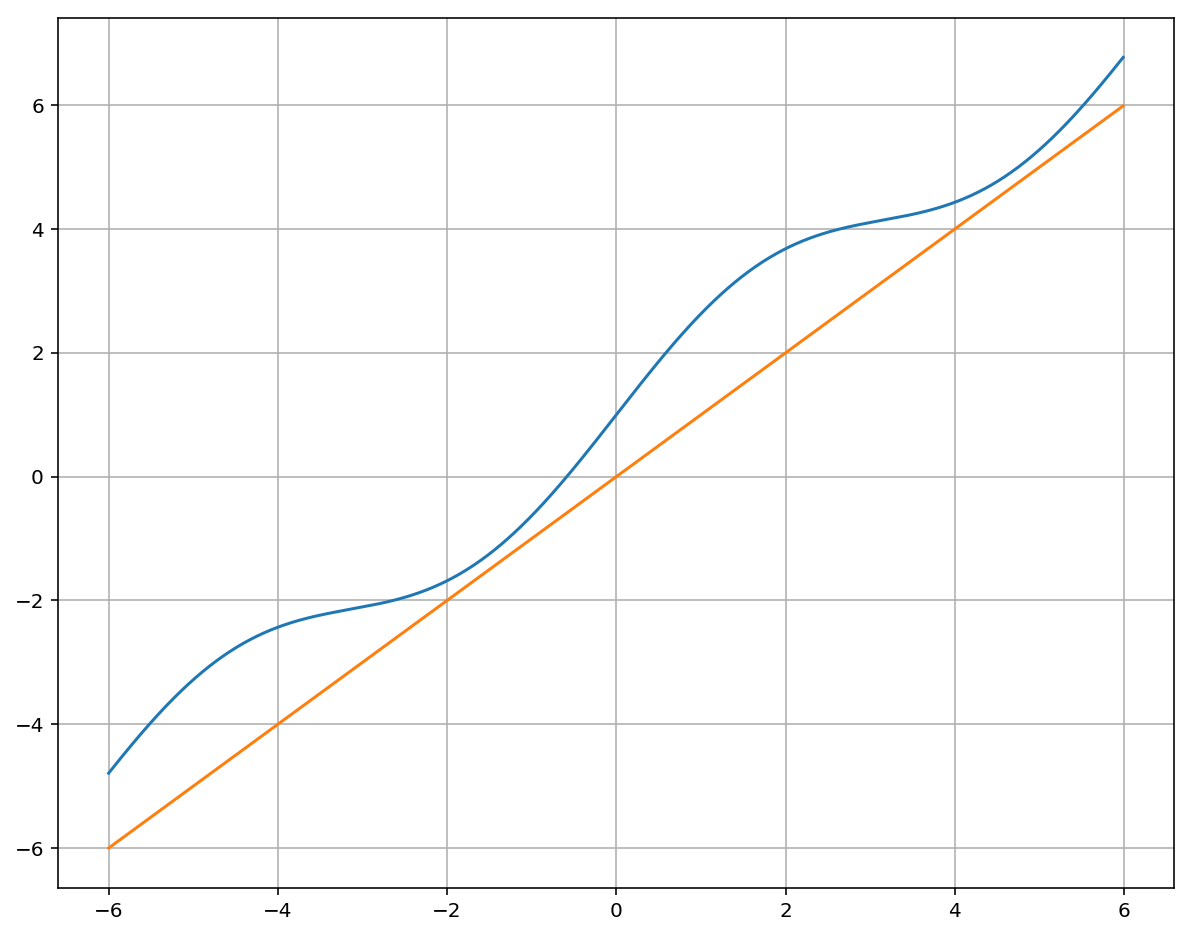

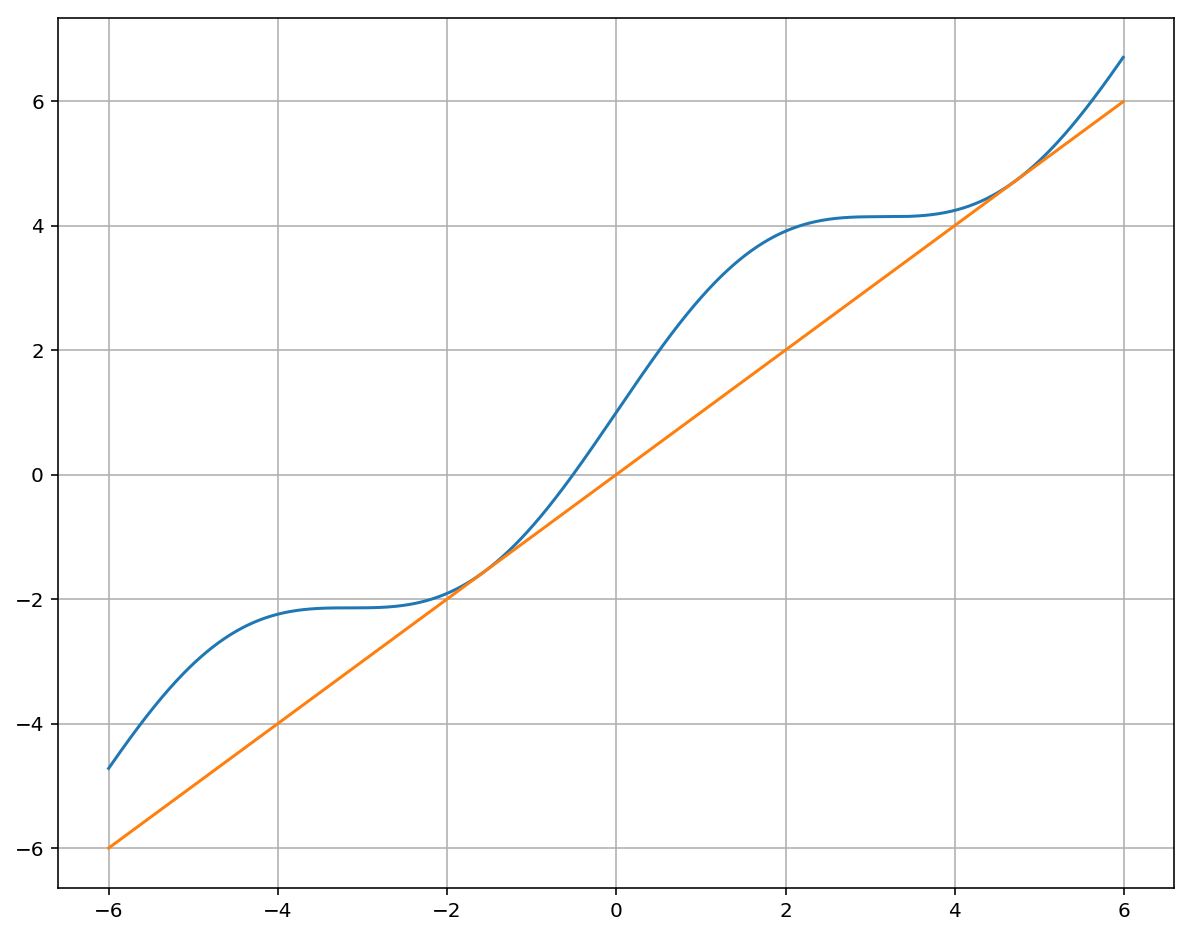

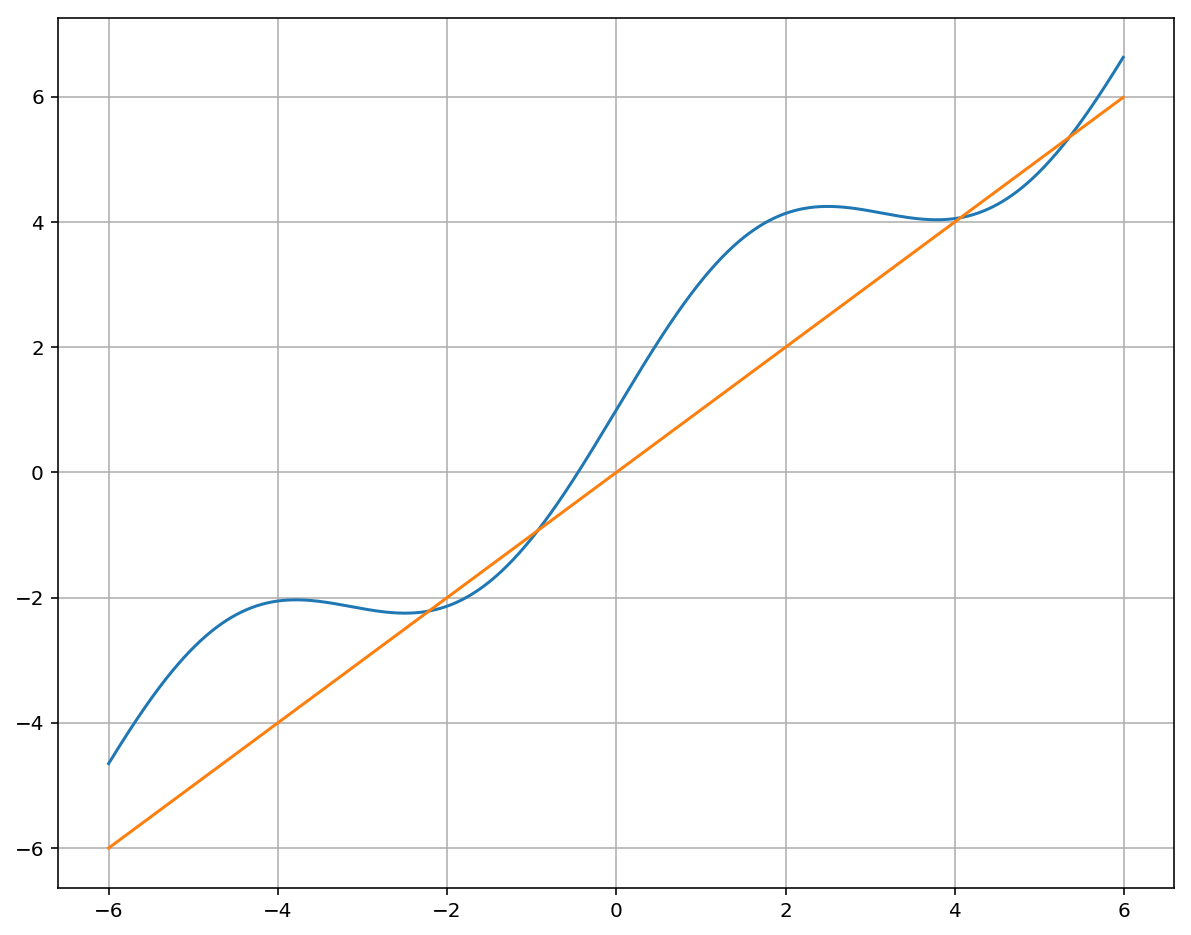

In [14]:
problem_3(0.75)
problem_3(1)
problem_3(1.25)

This is an example of a saddle node bifurication, as fixed points are being created.

In [15]:
def is_periodic(end, threshold=10**(-6)):
    not_lower_period = all([not math.isclose(end[0], item, rel_tol=threshold)
                            for item in end[1:-1]])
    return not_lower_period and math.isclose(end[0], end[-1], rel_tol=threshold)
        
def problem_4():
    logistic_family = lambda a: lambda x: a*x*(1-x)
    iterates = 1000
    k = 5
    
    for a in np.linspace(3.738, 3.739, 10**5):
        logistic_map = logistic_family(a)
        trajectory = iterate_map(logistic_map, [0.5], iterates)
        
        # get last few iterates
        end = trajectory[:,0][-(k + 1):] 
        if is_periodic(end):
            print(trajectory[:,0][-10:])
            return a
    else:
        return False

In [16]:
assert is_periodic([0.1, 0.1, 0.1]) == False
assert is_periodic([0.1, 0, 0.1]) == True
assert is_periodic([0.1, 0, 0, 0.100000000000001]) == True

In [18]:
problem_4()
# 3.738160816081608
# 3.7381732817328173
# 3.7381442814428145
# 3.7381768176817682
# 3.7381768176817682
# 3.738168941689417
# 3.738168561685617
# 3.7381688416884167

[0.22921753 0.6604479  0.83830855 0.50669878 0.93437447 0.22922012
 0.66045315 0.83830226 0.5067147  0.93437367]


3.7381688416884167

$a = 3.738169$

In [21]:
from fractions import Fraction 

def has_even_R(itinerary):
    return itinerary.count('R') % 2 == 0

def grow(itinerary):
    if has_even_R(itinerary):
        return [itinerary + 'L', itinerary + 'R']
    else:
        return [itinerary + 'R', itinerary + 'L']

def problem_6():
    # get bounds of itinerary of tent map
    itinerary = 'LRRRLRL'
#     itinerary = 'LRR'

    itineraries = ['']
    for i in range(len(itinerary)):
        acc = []
        for it in itineraries:
            acc += grow(it)
        itineraries = acc

#     print(itineraries)
    index = itineraries.index(itinerary)
#     print(index)
    start = index / len(itineraries)
    end = (index+1) / len(itineraries)

    print("Tent map, interval of itinerary: " + itinerary)
    print(start, end)
    
#     # then use conjugacy with logistic map to convert
    print("\nLogistic map (a=4), interval of itinerary: " + itinerary)
    conjugacy_fn = lambda x: math.sin(math.pi * x * 0.5) ** 2
    print(conjugacy_fn(start), conjugacy_fn(end))

In [22]:
problem_6()
# 0.0111010_2 = 0.453125_10
# 0.0111011_2 = 0.4609375_10

Tent map, interval of itinerary: LRRRLRL
0.34375 0.3515625

Logistic map (a=4), interval of itinerary: LRRRLRL
0.2643016315870011 0.27519433517269676


In [23]:
def problem_6_check(x_start=0.2643016315870011 + 0.001, x_end=0.27519433517269676 - 0.001):
    logistic_family = lambda a: lambda x: a*x*(1-x)
#     f = tent_map
    f = logistic_family(4)
    
    itinerary_start = ''
    itinerary_end = ''
        
    for i in iterate_map(f, [x_start], 6)[:, 0]:
        itinerary_start += 'L' if i <= 0.5 else 'R'
    
    for i in iterate_map(f, [x_end], 6)[:, 0]:
        itinerary_end += 'L' if i <= 0.5 else 'R'
        
    print(itinerary_start)
    print(itinerary_end)

problem_6_check()

LRRRLRL
LRRRLRL


In [24]:
def problem_9():
    fn = lambda x: np.sin(math.pi * x)
    fn_deriv = lambda x: math.pi * np.cos(math.pi * x)
    
    h_exp = compute_lyapunov_exponent(fn, fn_deriv, [0.2], 10**6)
    L = math.exp(h_exp)
    
    print("Lyapunov exponent:")
    print(h_exp)
    print("Lyapunov number:")
    print(L)

In [25]:
problem_9()

Lyapunov exponent:
0.6890502989135288
Lyapunov number:
1.9918229982485618


In [34]:
def problem_10():
    # get bounds of itinerary of tent map
    itinerary = 'LRRLLRLLR' + 'LRRLLRLLR'
#     itinerary = 'LRR'

    itineraries = ['']
    for i in range(len(itinerary)):
        acc = []
        for it in itineraries:
            acc += grow(it)
        itineraries = acc

#     print(itineraries)
    index = itineraries.index(itinerary)
    print(index, len(itineraries))
    start = index / len(itineraries)
    end = (index+1) / len(itineraries)

    print("Tent map, interval of itinerary: " + itinerary)
    print(start, end)

def problem_10_check(x_0 = 0.3681640625):
    tent_map = lambda x: 2*x if x <= 0.5 else 2-(2*x)
    f = tent_map
    
    itinerary = ''
        
    for i in iterate_map(f, [x_0], 8)[:, 0]:
        itinerary += 'L' if i <= 0.5 else 'R'
        
    print(itinerary)
    print(len(itinerary))

In [38]:
problem_10()
problem_10_check()
# 0.01000111001000111

72846 262144
Tent map, interval of itinerary: LRRLLRLLRLRRLLRLLR
0.27788543701171875 0.2778892517089844
LRRRLLLRL
9


In [41]:
def problem_11():
    a = -(3 * math.sqrt(3)) / 2
    fn = lambda x: a * (x - x**3)
    
    fig, ax = plt.subplots(figsize=(10, 8))
    
    trajectory = iterate_map(fn, [0.2], 10**5)
    ax.hist(trajectory, 100)

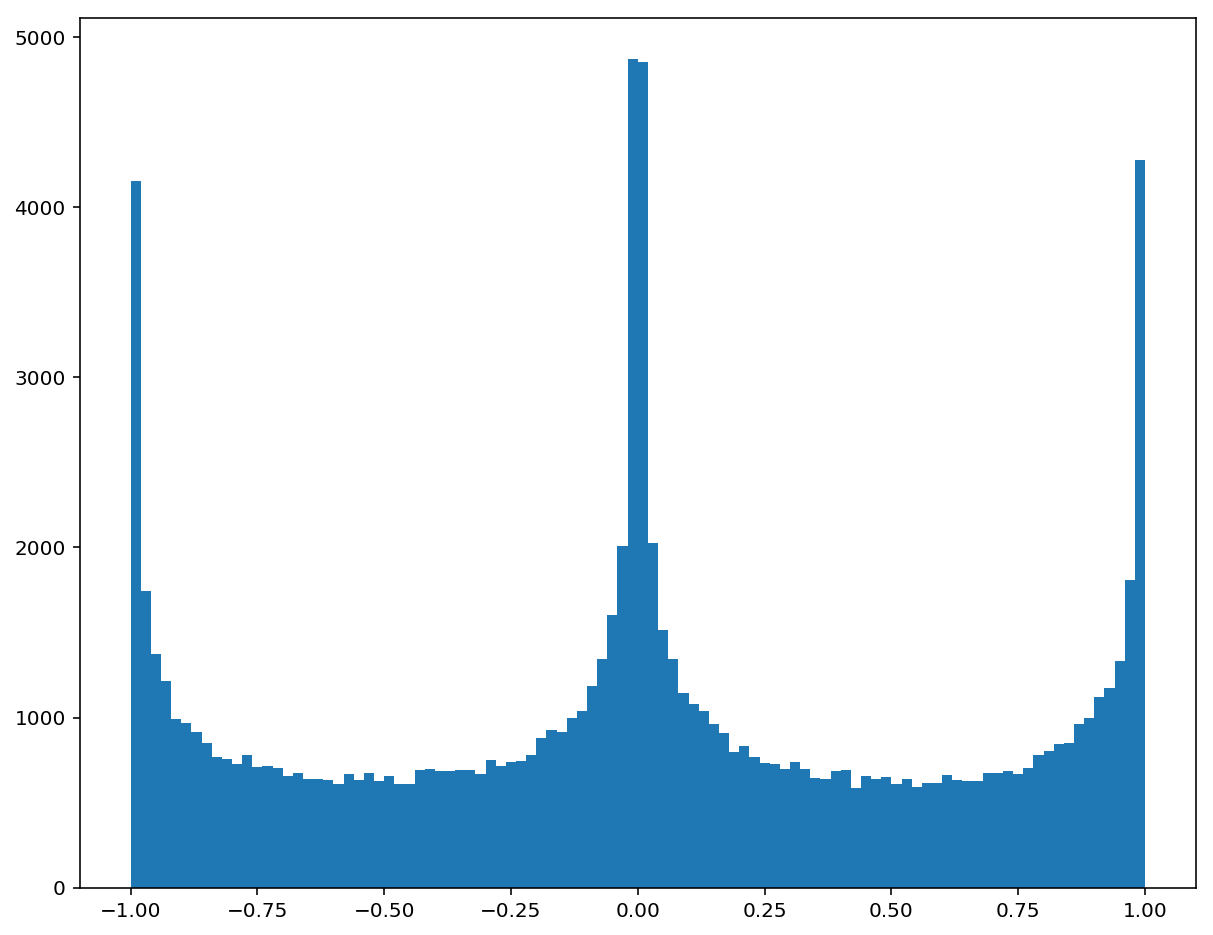

In [42]:
problem_11()

In [43]:
def problem_12():
    a = -(3 * math.sqrt(3)) / 2
    fn = lambda x: a * (x - x**3)
    fn_deriv = lambda x: a - 3*a*x**2
    
    h_exp = compute_lyapunov_exponent(fn, fn_deriv, [0.2], 10**6)
    L = math.exp(h_exp)
    
    print("Lyapunov exponent:")
    print(h_exp)
    print("Lyapunov number:")
    print(L)

In [44]:
problem_12()

Lyapunov exponent:
0.679894343735301
Lyapunov number:
1.973669190699341


In [45]:
henon = lambda a, b: lambda x, y: np.asarray((a - (x**2) + b * y, x))

def theta_circle(theta, radius=1):
    return [radius * np.cos(theta), radius * np.sin(theta)]

In [46]:
def problem_13():
    f = henon(1.4, 0.3)
    circle = theta_circle(np.linspace(0, 2 * math.pi, 10**5), 0.1)
    
    fig, ax = plt.subplots(figsize=(20, 32))
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)
    ax.set_aspect('equal')
    ax.grid(True)
    
    fp_x = (-0.7 + math.sqrt(6.09)) / 2
    fp_y = fp_x
    ax.plot(circle[0] + fp_x, circle[1] + fp_y)
    
    f14_circle = np.apply_along_axis(
        lambda row: iterate_map(f, row, 14)[-1],
        0, 
        [circle[0] + fp_x, circle[1] + fp_y] # circle with center at f.p.
    )
    
    ax.plot(circle[0] + fp_x, circle[1] + fp_y)
    ax.scatter(f14_circle[0], f14_circle[1], s=1)
    
    fig, ax = plt.subplots(figsize=(10, 16))
    ax.set_xlim(0.4, 0.6)
    ax.set_ylim(0.9, 1.1)
    ax.grid(True)
    
    ax.plot(circle[0] + fp_x, circle[1] + fp_y)
    ax.scatter(f14_circle[0], f14_circle[1], s=1)

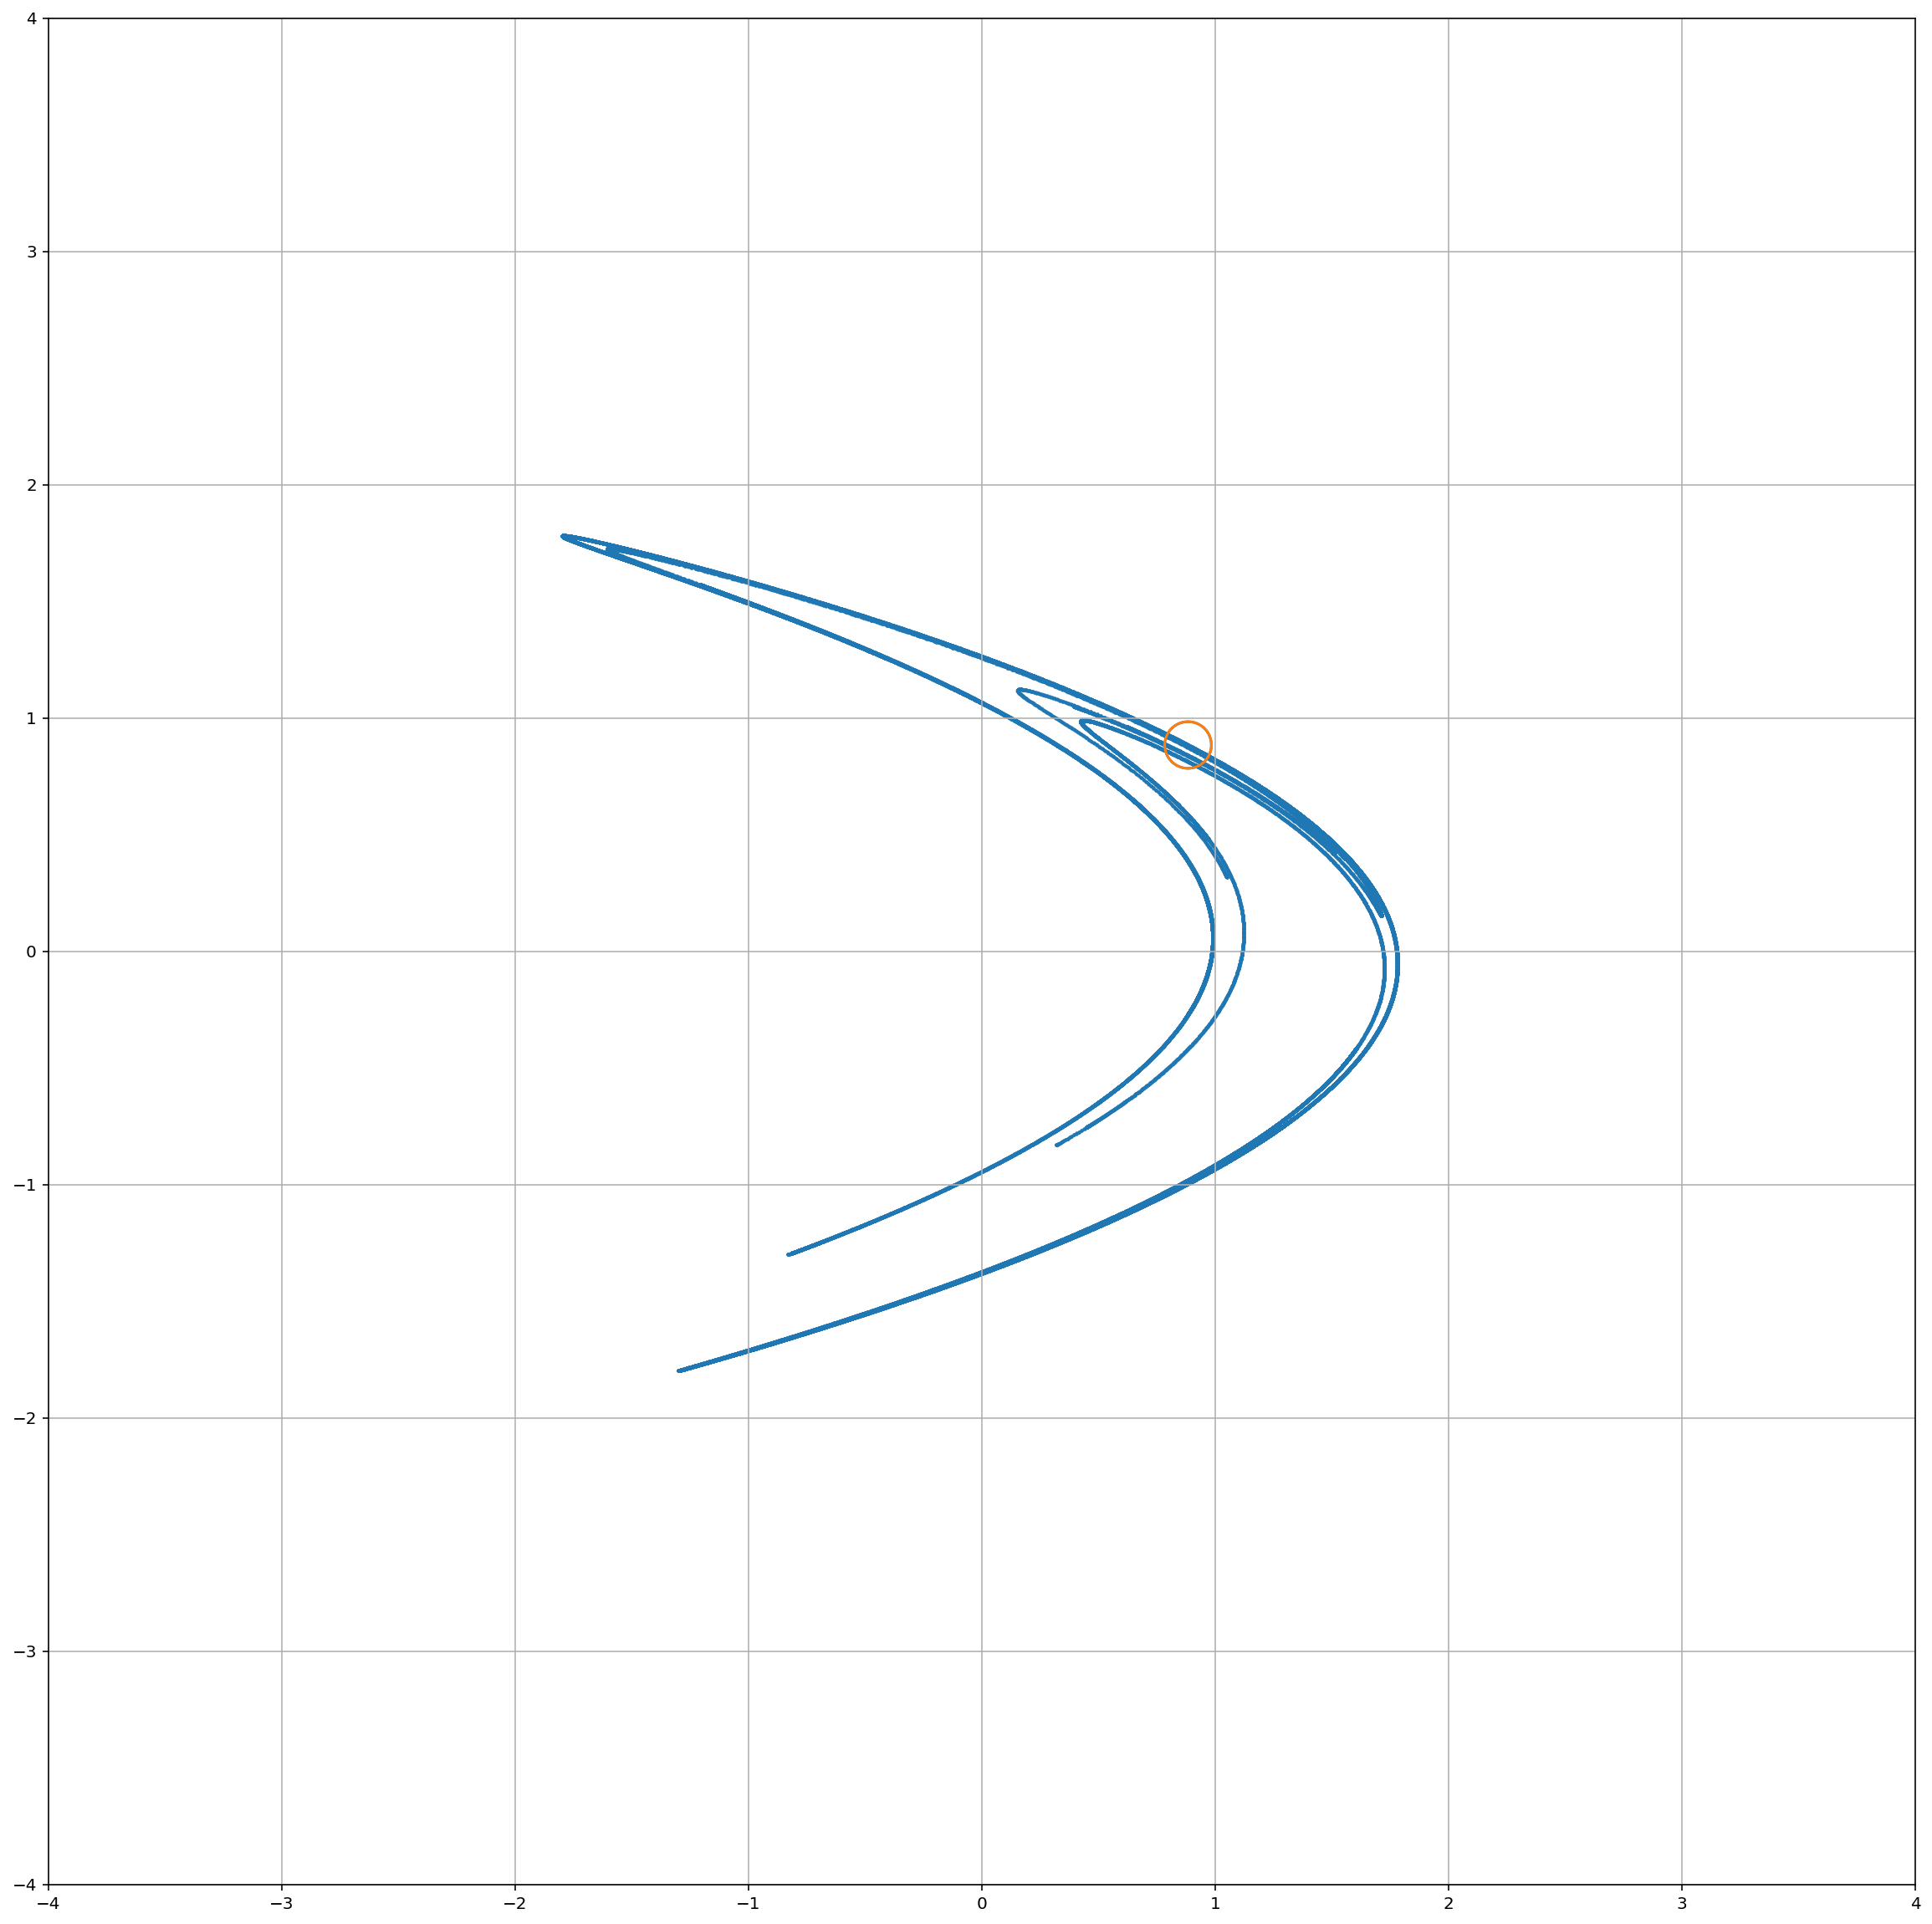

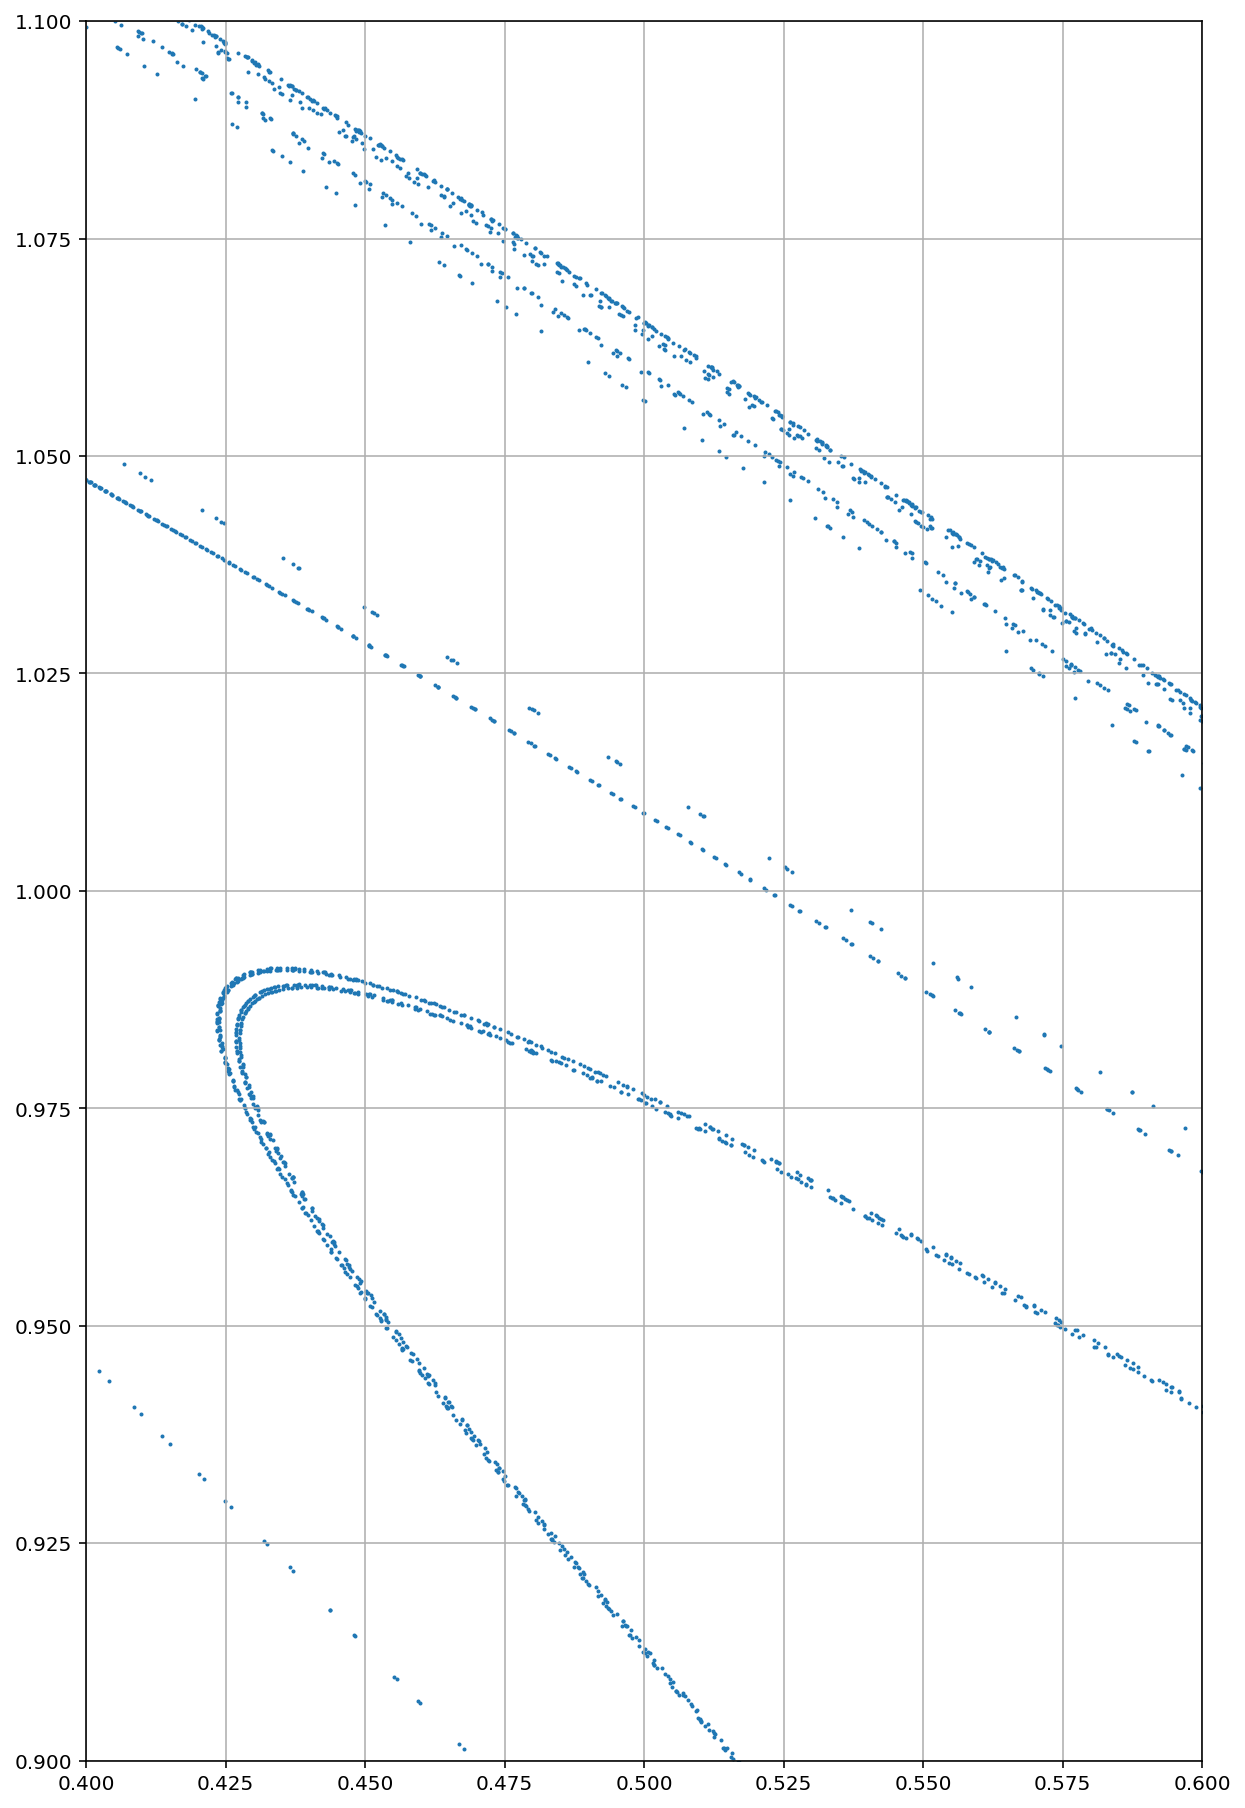

In [47]:
problem_13()